In [1]:
#This notebook's goal is to compare the effect of using an analytic vs. roman PSF for SMP.
# I have found that typically, the roman PSF performs worse than the analytic PSF.
# A tale of two PSFs: It was the best of times, it was the worst of times.
import numpy as np
import matplotlib.pyplot as plt
import yaml
from AllASPFuncs import *

In [2]:
#Open the config yaml file
config = yaml.safe_load(open("config.yaml"))
#Change use_roman to False
config['use_roman'] = False


config['deltafcn_profile'] = False
config['single_grid_point'] = False
config['adaptive_grid'] = True
config['turn_grid_off'] = False
config['bg_gal_flux'] = 1e5
config['testnum'] = 20
config['detim'] = 10

#Save the result
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

%run -i 'RomanASP.py'

Running the main function
All Configurations Loaded
ID: 30666595
Built a grid with 347 points
removed wgt when making adaptive grid
Gaussian std in getWeights 2.5
setting initial guess to 3000
2 296689 0.042235891036286964
Saving lightcurve to ./results/lightcurves/simulated_Y106_analyticpsf_lc.csv
Saving images to ./results/images/simulated_Y106_analyticpsf_images.npy


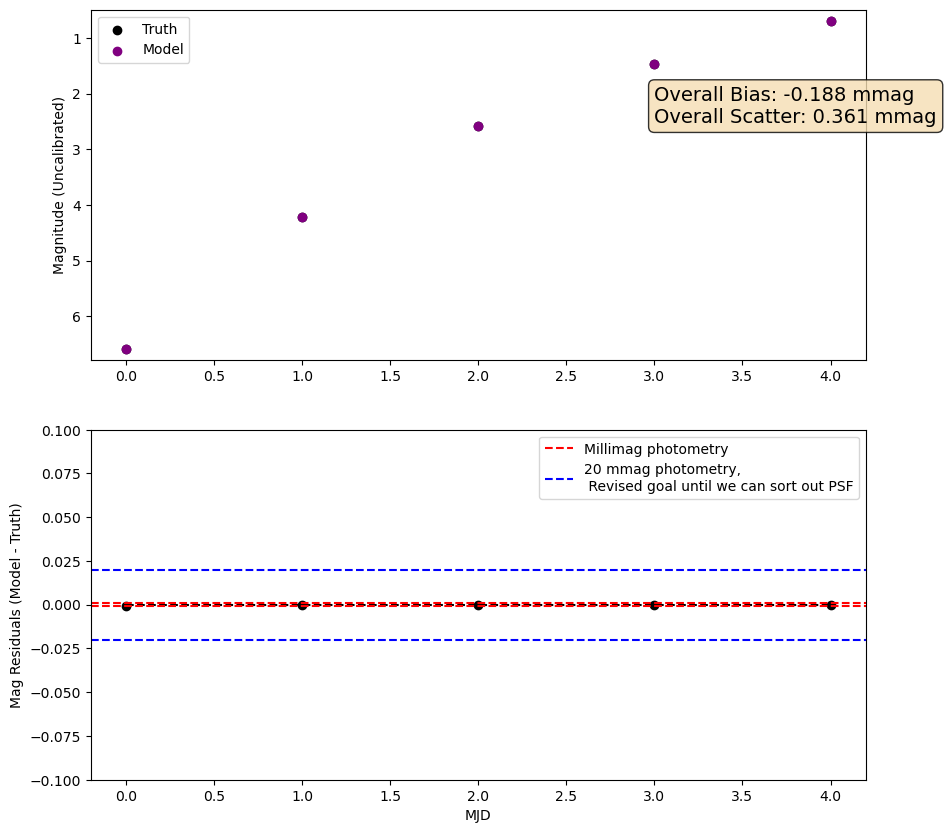

In [3]:
plot_lc('simulated_Y106_analyticpsf')

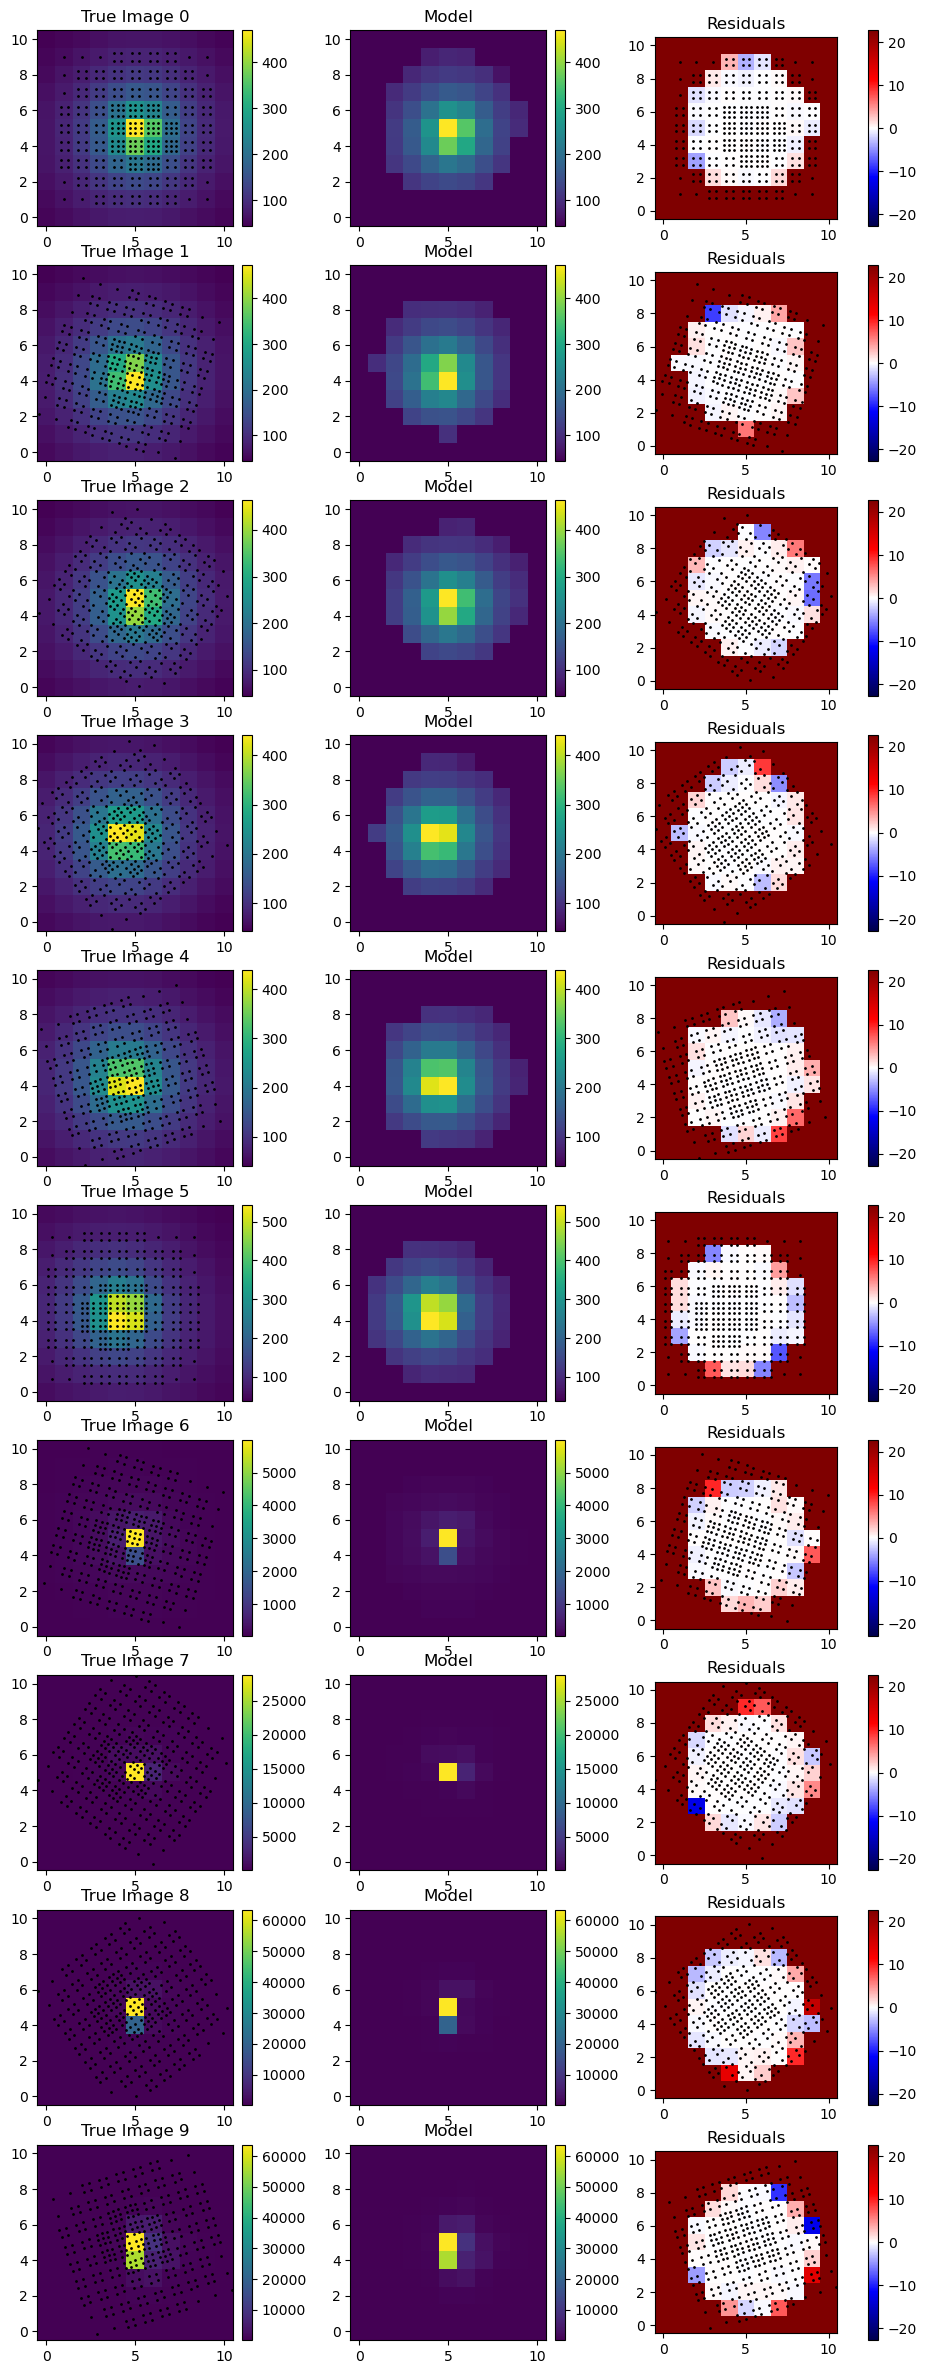

In [4]:
plot_images('simulated_Y106_analyticpsf')

In [22]:
#Open the config yaml file
config = yaml.safe_load(open("config.yaml"))
#Change use_roman to True
config['use_roman'] = True
config['detim'] = 10
config['testnum'] = 20

#Save the result
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

%run -i 'RomanASP.py'

Running the main function
All Configurations Loaded
ID: 30666595
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Built a grid with 344 points
removed wgt when making adaptive grid
Gaussian std in getWeights 2.5
setting initial guess to 3000
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getPSF_Image
Using 1e7 photons in getP

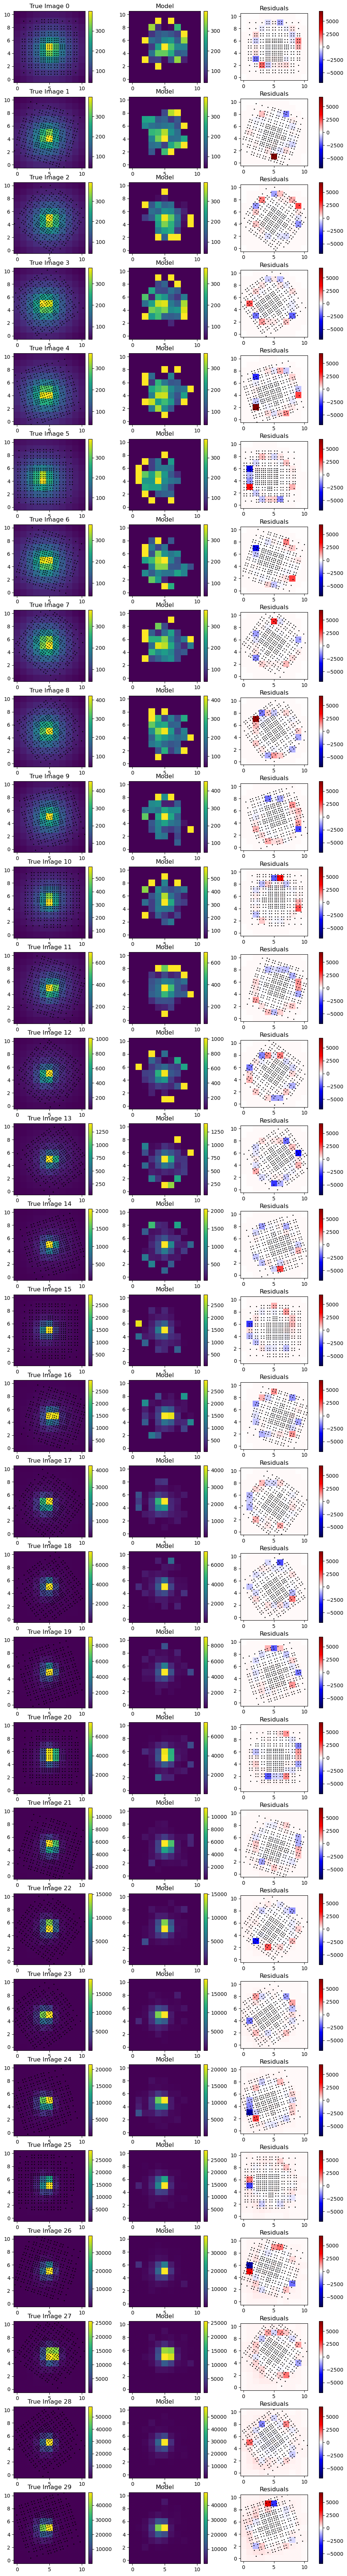

In [4]:
plot_images('simulated_Y106_romanpsf')

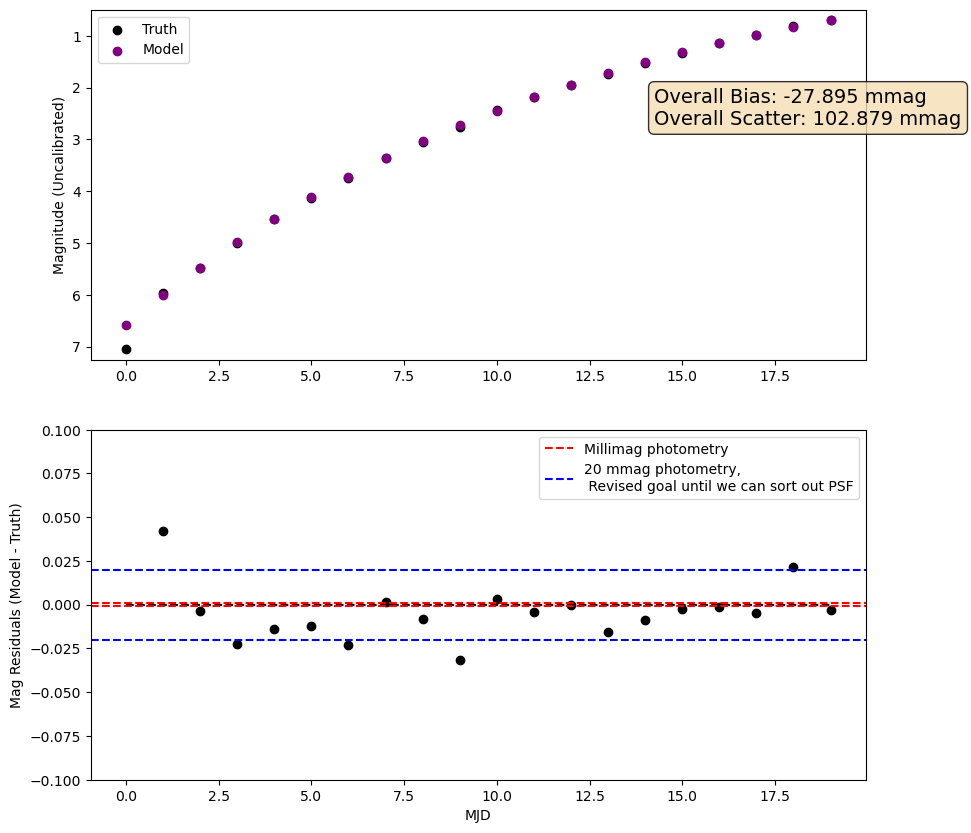

In [3]:
plot_lc('simulated_Y106_romanpsf')